# Performing Required Imports

In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import numpy as np
from keras.optimizers import SGD
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.metrics import classification_report
from keras import backend as K
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

Using TensorFlow backend.


# Part A - Convolutional Neural Network using Keras with Tensorflow backend

# Loading MNIST Dataset

In [2]:
(train_data,train_label),(test_data,test_label) = mnist.load_data()

# Adding an extra dimension to make the input inline with the model

In [3]:
x_train = train_data[:,:,:,np.newaxis]
x_test = test_data[:,:,:,np.newaxis]

# Transform the training and test labels into vectors in the range [0, classes] -- This generates a vector for each label, where the index of the label is set to 1 and all other entries to 0; in the case of MNIST, there are 10 class labels

In [4]:
y_train = np_utils.to_categorical(train_label, 10)
y_test = np_utils.to_categorical(test_label, 10)

# Checking dimensions of data

In [5]:
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# Architecture

In [7]:
model = Sequential()

# first set of CONV => RELU => POOL
model.add(Convolution2D(6, 3, 3, border_mode="same", input_shape=(28, 28, 1)))
conv1 = Activation("relu") 
model.add(conv1)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(Convolution2D(16, 5, 5, border_mode="same"))
conv2 = Activation("relu") 
model.add(conv2)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# first set of CONV => DROPOUT => RELU => POOL
model.add(Convolution2D(46, 7, 7, border_mode="same"))
model.add(Dropout(0.25))
conv3 = Activation("relu") 
model.add(conv3)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# first set of FC => softmax
model.add(Flatten())
model.add(Dense(10))
fc = Activation("softmax") 
model.add(fc)

model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=True), metrics=["accuracy"])

/home/talha/anaconda/envs/conda_env/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (3, 3), padding="same", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/home/talha/anaconda/envs/conda_env/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/home/talha/anaconda/envs/conda_env/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(46, (7, 7), padding="same")`
  app.launch_new_instance()


# Training The Model

In [8]:
call=TensorBoard(log_dir="logs/run_mnist",write_grads=True,histogram_freq=1,write_graph=True, 
                 write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
history = model.fit(x_train, y_train, batch_size=128, nb_epoch=50, validation_split = 0.2, verbose=1, 
                    callbacks=[call])

/home/talha/anaconda/envs/conda_env/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 167us/step - loss: 1.4372 - acc: 0.7954 - val_loss: 0.1949 - val_acc: 0.9383
Epoch 2/50
48000/48000 [==============================] - 7s 143us/step - loss: 0.2539 - acc: 0.9223 - val_loss: 0.1456 - val_acc: 0.9551
Epoch 3/50
48000/48000 [==============================] - 7s 139us/step - loss: 0.1961 - acc: 0.9388 - val_loss: 0.1248 - val_acc: 0.9602
Epoch 4/50
48000/48000 [==============================] - 7s 139us/step - loss: 0.1639 - acc: 0.9486 - val_loss: 0.1117 - val_acc: 0.9649
Epoch 5/50
48000/48000 [==============================] - 7s 148us/step - loss: 0.1420 - acc: 0.9558 - val_loss: 0.1012 - val_acc: 0.9684
Epoch 6/50
48000/48000 [==============================] - 7s 147us/step - loss: 0.1276 - acc: 0.9590 - val_loss: 0.0937 - val_acc: 0.9718
Epoch 7/50
48000/48000 [==============================] - 7s 146us/step - loss: 0.1165 - acc: 0.9633 - val_loss: 0.0892 - 

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 46)          36110     
__________

# Testing The Model

In [10]:
(loss, accuracy) = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

10000/10000 [==============================] - 0s 25us/step
accuracy: 98.77%


# Part B - Visualization

# Visualizing The Loss and Accuracy

['acc', 'loss', 'val_acc', 'val_loss']


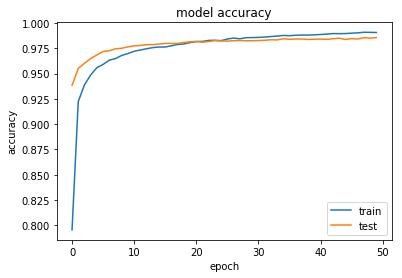

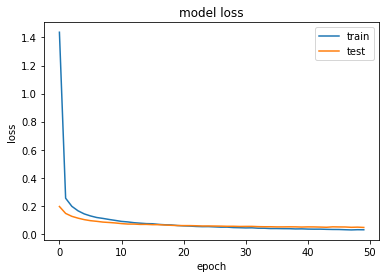

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [13]:
def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

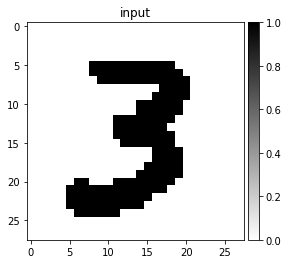

In [14]:
i = 4600

# Visualize the first layer of convolutions on an input image
X = test_data[i:i+1]

plt.figure()
plt.title('input')
nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)

# Weight Visualization

In [20]:
# choose any image to want by specifying the index
img_to_visualize = x_train[65]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [21]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

('Shape of conv:', (28, 28, 6))


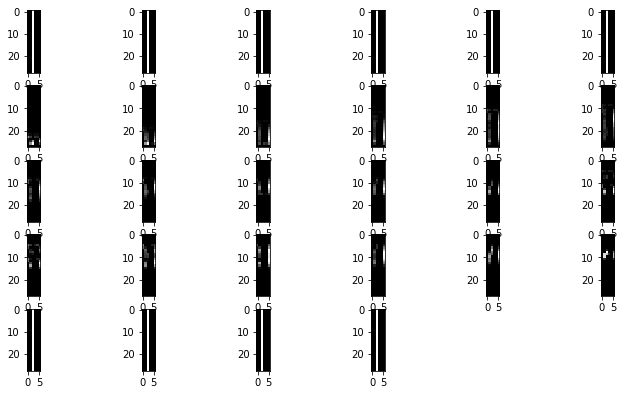

In [23]:
# Specify the layer to want to visualize
layer_to_visualize(conv1)

('Shape of conv:', (14, 14, 16))


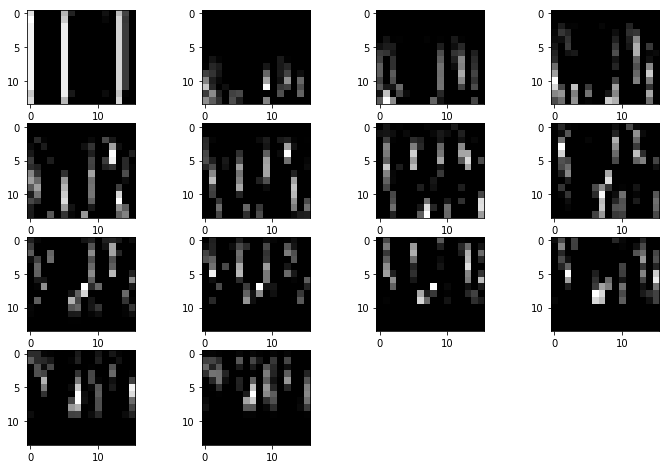

In [24]:
layer_to_visualize(conv2)

('Shape of conv:', (7, 7, 46))


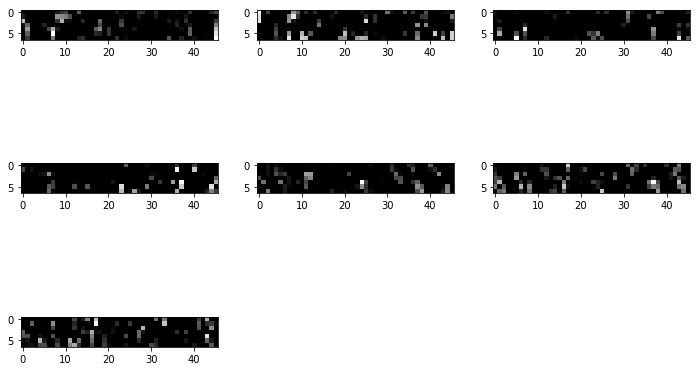

In [25]:
layer_to_visualize(conv3)

# Conclusion

### The Model has 3 Convolution Layers using 6, 16 and 46 filters of sizes 3x3, 5x5 and 7x7 respectively each with Relu and Max pooling with  Dropout of 0.25 after the last convolution layer. Learning Rate is 0.0001 with nestrov momentum 0.9 using SGD as optimizer and utilizing categorical_crossentropy as loss while accuracy as a metric. The model has a Batch  Size of 128 with 30 epochs providing a Training Accuracy of 99.06% while Test Accuracy of 98.77%